**Import Libaries**

In [3]:
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

**Task 1: Data set**

Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incomplete5KU2Z2/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


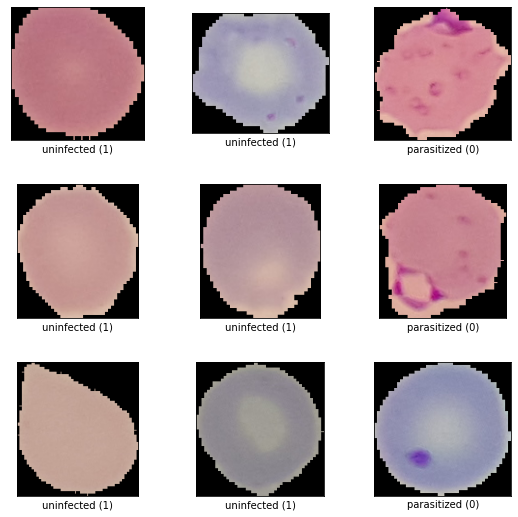

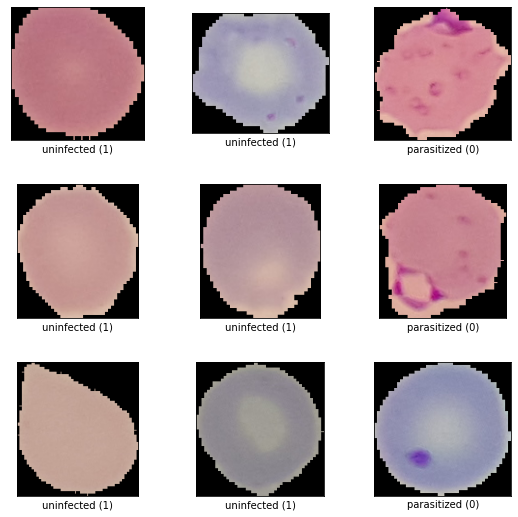

In [4]:
# Description: First, the malaria dataset is loaded as a 2-tuple (image and label). 
#              We use the "show_examples" function to check, if the dataset is loaded properly and to get an insight into the images we are working with.

raw_dataset, raw_data_info = tfds.load('Malaria', split='train', as_supervised = True, with_info = True)
tfds.show_examples(raw_dataset, raw_data_info)

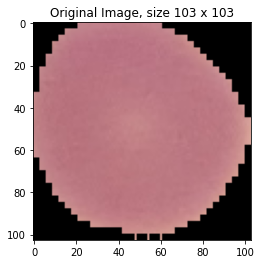

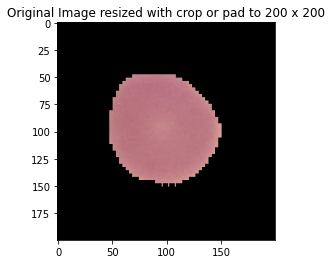

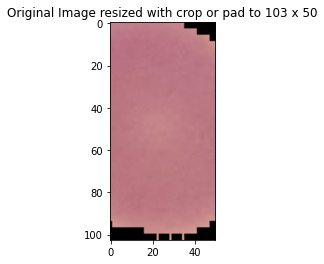

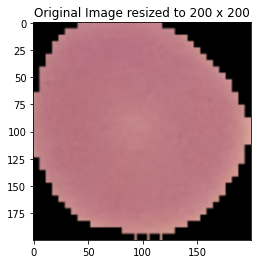

In [5]:
# This is an example to see how the functions "resize_with_crop_or_pad" and "resize" work. 

for img, tar in raw_dataset:

  plt.title('Original Image, size 103 x 103')
  plt.imshow(img.numpy())
  plt.show()

  plt.title('Original Image resized with crop or pad to 200 x 200')
  img_padded = tf.image.resize_with_crop_or_pad(img, 200, 200)
  plt.imshow(img_padded.numpy())
  plt.show()

  plt.title('Original Image resized with crop or pad to 103 x 50')
  img_cropped = tf.image.resize_with_crop_or_pad(img, 103, 50)
  plt.imshow(img_cropped.numpy())
  plt.show()

  plt.title('Original Image resized to 200 x 200')
  img_resized = tf.image.resize(img, [200, 200])
  plt.imshow(img_resized.numpy().astype('uint8'))
  plt.show()

  break


In [6]:
# Determines the maximum height and width of all images in the dataset to infer the largest edge length.

def get_max_edge_length(dataset):
  max_img_height = 0           
  max_img_width = 0
  
  for (input, target) in dataset:      
    img_shape = input.shape
    if img_shape[0] > max_img_height: 
      max_img_height = img_shape[0]
    if img_shape[1] > max_img_width: 
      max_img_width = img_shape[1]   
  
  if max_img_width > max_img_height:
    max_edge_length = max_img_width
  else:
    max_edge_length = max_img_height
  
  return max_edge_length

print('Largest edge length of dataset: ' + str(get_max_edge_length(raw_dataset)) + ' pixels')

Largest edge length of dataset: 394 pixels
